## GReaT Example with Iris Dataset

In [1]:
# # Execute only once!
# import os
# import sys
# sys.path.append("..")
# os.chdir("..")

# os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import os
import sys
sys.path.insert(0, "/home/qfyan/FedFetch/be_great")
# sys.path.insert(0, os.path.abspath("~/cs848-group-project/be_great"))
# sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("~/cs848-group-project/be_great/examples/Example_Iris.ipynb"), '..')))
# sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("~/cs848-group-project/be_great/examples"))))
os.environ["WANDB_DISABLED"] = "true"
sys.path


['/home/qfyan/FedFetch/be_great',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/home/qfyan/FedFetch/env/lib/python3.10/site-packages']

In [3]:
import numpy as np
import pandas as pd
import logging
from sklearn import datasets

In [4]:
from utils import set_logging_level


In [5]:
import matplotlib.pyplot as plt

In [6]:
logger = set_logging_level(logging.INFO)

### Load Data

In [7]:
data = datasets.load_iris(as_frame=True).frame
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
data.columns = ["sepal length", "sepal width", "petal length", "petal width", "target"]

### Create GReaT Model

In [9]:
from be_great.great import GReaT
from be_great.DPLLMTGen import DPLLMTGen


great = GReaT("meta-llama/Llama-2-7b-chat-hf",  # Name of the large language model used (see HuggingFace for more options)
              epochs=20,                   # Number of epochs to train
            #   save_steps=2000,               # Save model weights every x steps
              logging_steps=20,             # Log the loss and learning rate every x steps
              experiment_dir="trainer_great", # Name of the directory where all intermediate steps are saved
              batch_size=16,                 # Batch Size
              #lr_scheduler_type="constant", # Specify the learning rate scheduler 
              learning_rate=4e-5,            # Set the inital learning rate
              efficient_finetuning="lora",
              use_8bit_quantization=True,
             )

# great = DPLLMTGen(
#     "gpt2",
#     # epochs=1000,
#     # save_steps=2000,
#     logging_steps=50,
#     experiment_dir="trainer_iris_dpllmtgen_test",
#     batch_size=16,                 # Batch Size
#     # lr_scheduler_type="constant", # Specify the learning rate scheduler 
#     stage1_epochs = 75,
#     stage2_epochs = 600,
#     stage1_lr =1e-4,
#     stage2_lr=1e-5,
#     loss_alpha=0.65,
#     loss_beta=0.1,
#     loss_lmbda=1.0,
#     per_sample_max_grad_norm=3., 
#     target_epsilon=10., 
#     # efficient_finetuning="lora"
# )

# great = DPLLMTGen(
#     "meta-llama/Llama-2-7b-chat-hf",
#     # epochs=1000,
#     # save_steps=2000,
#     logging_steps=20,
#     experiment_dir="trainer_iris_dpllmtgen_test",
#     batch_size=16,                 # Batch Size
#     # lr_scheduler_type="constant", # Specify the learning rate scheduler 
#     stage1_epochs = 10,
#     stage2_epochs = 4,
#     stage1_lr =1e-4,
#     stage2_lr=5e-4,
#     loss_alpha=0.65,
#     loss_beta=0.1,
#     loss_lmbda=1.0,
#     per_sample_max_grad_norm=1., 
#     target_epsilon=10., 
#     efficient_finetuning="lora",
#     use_dp=False
# )

# from be_great.dp_basic import DPBasic
# great = DPBasic("distilgpt2",                  # Name of the large language model used (see HuggingFace for more options)
#               epochs=1,                   # Number of epochs to train
#               save_steps=2000,               # Save model weights every x steps
#               logging_steps=100,             # Log the loss and learning rate every x steps
#               experiment_dir="trainer_iris_basic_dp_test", # Name of the directory where all intermediate steps are saved
#               batch_size=8,                 # Batch Size
#               per_sample_max_grad_norm=1.0,
#               target_epsilon=3.0,
#               #lr_scheduler_type="constant", # Specify the learning rate scheduler 
#               #learning_rate=4e-5            # Set the inital learning rate
#               #efficient_finetuning="lora",
#               save_safetensors=False
#              )

/home/qfyan/FedFetch/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-12-04 01:12:36,963 - INFO - PyTorch version 2.5.1+cu121 available. (config.py:54)
`low_cpu_mem_usage` was None, now default to True since model is quantized.
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]


trainable params: 19,988,480 || all params: 6,758,404,096 || trainable%: 0.2957573965106688


### Start Training

In [10]:
trainer = great.fit(data)

2024-12-04 01:12:41,368 - INFO - Convert data into HuggingFace dataset object... (great.py:197)
2024-12-04 01:12:41,383 - INFO - Create GReaT Trainer... (great.py:202)
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/home/qfyan/FedFetch/be_great/be_great/great.py:209: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `GReaTTrainer.__init__`. Use `processing_class` instead.
  great_trainer = GReaTTrainer(
2024-12-04 01:12:41,408 - INFO - Start training... (great.py:218)
You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.
/home/qfyan/FedFetch/env/li

Step,Training Loss
20,1.657500
40,0.878000
60,0.644400
80,0.516900
100,0.462500
120,0.432200
140,0.421300
160,0.412800
180,0.406800
200,0.404400


In [12]:
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()

{'train_runtime': 118.3075,
 'train_samples_per_second': 25.358,
 'train_steps_per_second': 1.691,
 'total_flos': 4890971086848000.0,
 'train_loss': 0.6236851215362549,
 'epoch': 20.0,
 'step': 200}

In [13]:
loss = [x["loss"] for x in loss_hist[:]]
epochs = [x["epoch"] for x in loss_hist[:]]

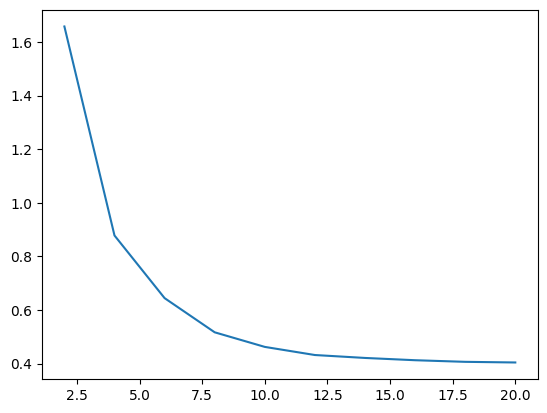

In [14]:
plt.plot(epochs, loss)

### Save Model

In [7]:
great.save("iris_llama1")


/home/qfyan/FedFetch/env/lib/python3.10/site-packages/transformers/integrations/peft.py:418: FutureWarning: The `active_adapter` method is deprecated and will be removed in a future version.
  warnings.warn(


### Load Model

In [6]:
from be_great.great import GReaT
great = GReaT.load_peft_model("iris_llama")

/home/qfyan/FedFetch/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
`low_cpu_mem_usage` was None, now default to True since model is quantized.
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]


### Generate Samples

In [7]:
n_samples = 150

In [8]:
samples = great.sample(n_samples, k=50, device="cuda")

180it [00:28,  6.30it/s]                         


In [9]:
samples.head()

,sepal length,sepal width,petal length,petal width,target
0,5.3,3.1,1.6,0.2,0.0
1,4.8,3.0,1.5,0.2,0.0
2,6.1,2.7,5.4,2.1,2.0
3,5.5,2.5,4.2,1.5,1.0
4,5.8,3.0,4.2,1.5,1.0


In [18]:
samples.to_csv("iris_dpllmtgen_test.csv")

We can also influence the distribution of the column on which the generation is conditioned (In the original dataset all three target values (0, 1, 2) have a probability of 33%).

In [ ]:
samples_custom = great.sample(n_samples, k=50, start_col="target",
                              start_col_dist={"0": 0.5, "1": 0.5, "2": 0})

In [ ]:
samples_custom.head()

## Plot Data

Original Data

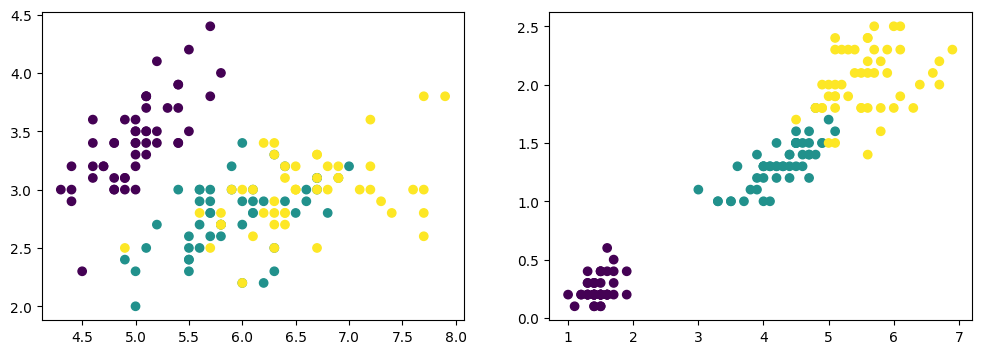

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(data["sepal length"], data["sepal width"], c=data["target"])
ax[1].scatter(data["petal length"], data["petal width"], c=data["target"])

Generated samples

In [ ]:
samples = pd.read_csv("iris_dpllmtgen_test.csv")

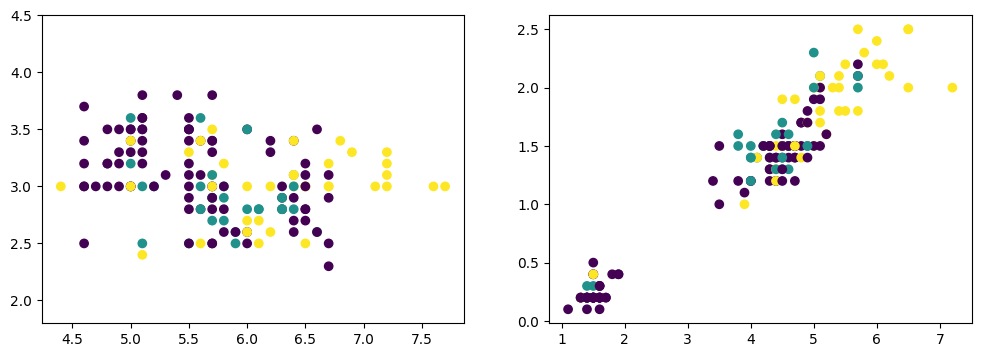

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(samples["sepal length"], samples["sepal width"], c=samples["target"].astype("int"))
ax[0].set_ylim(1.8, 4.5)
ax[1].scatter(samples["petal length"], samples["petal width"], c=samples["target"].astype("int"))